# Stock Price Prediction

Importing Libraries of Pandas, Numpy and Matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Read the csv file of CBA stock price data (25 Years) from 01/01/1999 to 31/12/2023 collected from Yahoo Finance

In [2]:
price = pd.read_csv(r'C:\Users\Kali\Downloads\CBA_99-23.AX.csv')
row = len(price)
print(f"Total No. of Row of Data: {row}")
print()
print(price.head(10))

Total No. of Row of Data: 6369

         Date       Open       High        Low      Close  Adj Close   Volume
0  1999-01-01  23.025249  23.025249  23.025249  23.025249   6.187560        0
1  1999-01-04  23.442986  23.442986  22.776596  22.776596   6.120739  1050289
2  1999-01-05  23.144602  23.144602  22.776596  22.786543   6.123413  1763572
3  1999-01-06  23.074980  23.074980  22.925789  22.970545   6.172857  1385310
4  1999-01-07  23.771208  23.771208  23.114763  23.572285   6.334566  2657203
5  1999-01-08  23.393255  23.393255  22.975517  23.074980   6.200923   929049
6  1999-01-11  23.224171  23.224171  22.726866  22.832294   6.135707   763035
7  1999-01-12  22.671167  22.671167  22.428482  22.577675   6.067282   878735
8  1999-01-13  22.428482  22.428482  22.219614  22.245474   5.978013  1347803
9  1999-01-14  22.159937  22.159937  21.931175  22.030638   5.920277  1034306


Print only the prices of Date with Open, High, Low, and Close Only and It's Average

In [3]:
ohlc = price[['Date','Open','High','Low','Close']].copy()
col1 = ohlc['Open']
col2 = ohlc['High']
col3 = ohlc['Low']
col4 = ohlc['Close']
ohlc.loc[:,'Avg_OHLC'] = (col2+col1+col3+col4) / 4
merged = pd.merge(ohlc,ohlc)
print(merged.head(10))

         Date       Open       High        Low      Close   Avg_OHLC
0  1999-01-01  23.025249  23.025249  23.025249  23.025249  23.025249
1  1999-01-04  23.442986  23.442986  22.776596  22.776596  23.109791
2  1999-01-05  23.144602  23.144602  22.776596  22.786543  22.963086
3  1999-01-06  23.074980  23.074980  22.925789  22.970545  23.011574
4  1999-01-07  23.771208  23.771208  23.114763  23.572285  23.557366
5  1999-01-08  23.393255  23.393255  22.975517  23.074980  23.209252
6  1999-01-11  23.224171  23.224171  22.726866  22.832294  23.001876
7  1999-01-12  22.671167  22.671167  22.428482  22.577675  22.587123
8  1999-01-13  22.428482  22.428482  22.219614  22.245474  22.330513
9  1999-01-14  22.159937  22.159937  21.931175  22.030638  22.070422


Print Yearly Average of OHLC

In [4]:
avg_price = pd.DataFrame(ohlc)
avg_price['Date'] = pd.to_datetime(avg_price['Date'])
avg_price['Year'] = avg_price['Date'].dt.year

yearly_price = avg_price.groupby('Year')['Avg_OHLC'].mean().reset_index()
yearly_price.columns = ['Year','Price']
row = len(yearly_price)
print(f"Total No. of Row of Data: {row}")
print(yearly_price)

Total No. of Row of Data: 25
    Year       Price
0   1999   24.885687
1   2000   27.088517
2   2001   29.749614
3   2002   30.848705
4   2003   27.574880
5   2004   31.282420
6   2005   37.180185
7   2006   45.155822
8   2007   54.299658
9   2008   41.717734
10  2009   40.644120
11  2010   52.285786
12  2011   49.600598
13  2012   53.380320
14  2013   70.354230
15  2014   78.631951
16  2015   83.327946
17  2016   75.554466
18  2017   81.213438
19  2018   72.727950
20  2019   77.243365
21  2020   71.609230
22  2021   95.992534
23  2022  100.122898
24  2023  101.549638


Plot the graph of Year Vs Price

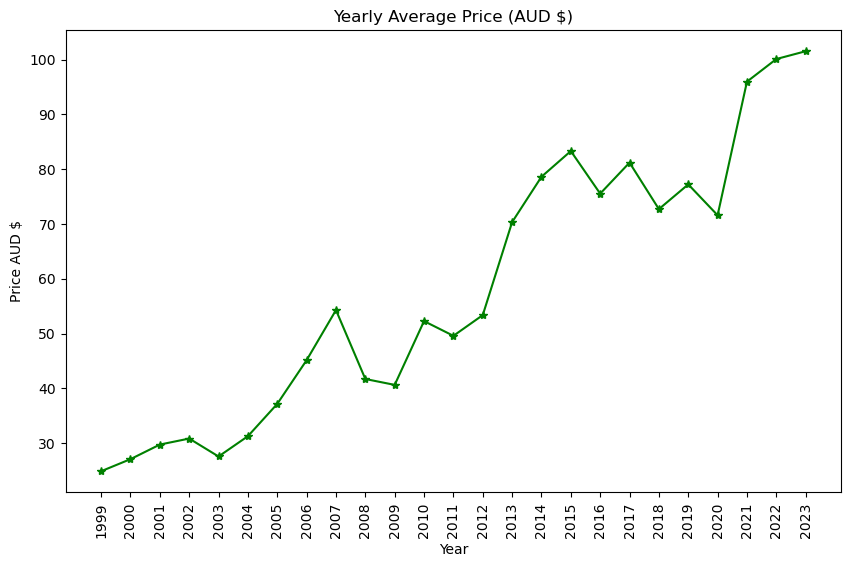

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(yearly_price['Year'], yearly_price['Price'], color = 'green', marker = '*')
plt.title('Yearly Average Price (AUD $)')
plt.xlabel('Year')
plt.ylabel('Price AUD $')
plt.xticks(yearly_price.Year, rotation=90)
plt.show()

# Machine Learning - Linear regression Model to Predict Future Price

Future Price Prediction [2024 to 2028] AUD $: [ 97.68679954 100.84430447 104.00180941 107.15931434 110.31681927]
Mean Squared Error: 83.84178802306698
Mean Absolute Error: 8.086539344436467
Enter a future year to invest in CBA: 2030
Future Price Prediction for the Year 2030: $ 116.63
Enter an amount to invest in that future year: $1000
You will buy 8.57 stocks in the year of 2030


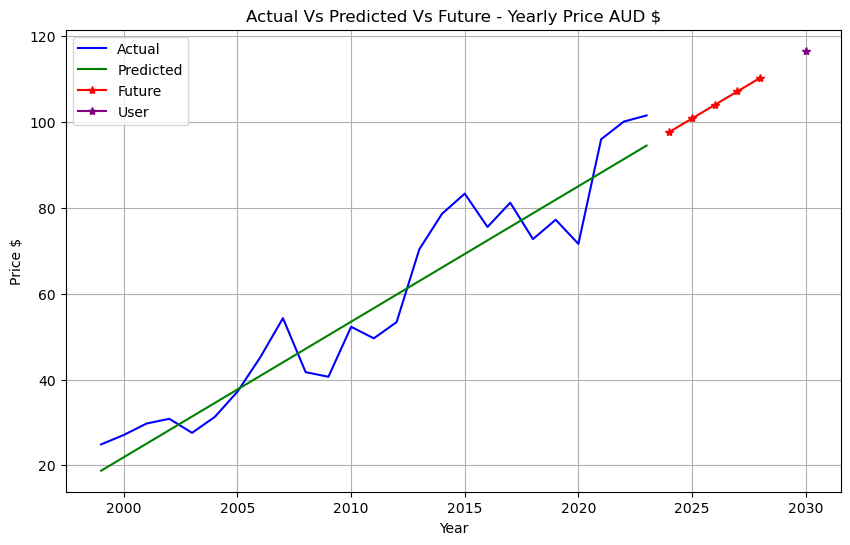

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming 'yearly_price' is the data with 'Year' and 'Price' columns
df = pd.DataFrame(yearly_price)

X = df[['Year']]
y = df['Price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Future years to predict
future_years = [2024, 2025, 2026, 2027, 2028]
future_year_price = pd.DataFrame({'Year': future_years})
predictions_price = model.predict(future_year_price)

# Display predictions and errors
print("Future Price Prediction [2024 to 2028] AUD $:", predictions_price)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

# User input for a specific year prediction
new_input = int(input("Enter a future year to invest in CBA: "))
new_future_year_price = pd.DataFrame({'Year': [new_input]})
new_predictions_price = model.predict(new_future_year_price)
print(f"Future Price Prediction for the Year {new_input}: $", round(new_predictions_price[0], 2))

# Investment calculation
invest = int(input("Enter an amount to invest in that future year: $"))
stocks = invest / new_predictions_price.item()
print(f"You will buy {stocks:.2f} stocks in the year of {new_input}")

# Plot the results
plt.figure(figsize=(10, 6))
X_range = pd.DataFrame({'Year': np.linspace(X['Year'].min(), X['Year'].max(), 100)})
y_range = model.predict(X_range)
plt.plot(X, y, color='blue', label="Actual")
plt.plot(X_range, y_range, color='green', label="Predicted")
plt.plot(future_year_price['Year'], predictions_price, color='red', label="Future", marker="*")
plt.plot(new_future_year_price['Year'], new_predictions_price, color="purple", marker="*", label="User")
plt.grid(True)
plt.xlabel("Year")
plt.ylabel("Price $")
plt.title("Actual Vs Predicted Vs Future - Yearly Price AUD $")
plt.legend()
plt.show()